# matlplotlib基本图形绘制
[matplolib官网链接](https://matplotlib.org/stable/gallery/index.html)
- 使用Python基础环境，在命令行中安装命令： pip install matplotlib
- 使用Anaconda环境，就不用安装了，自带了
- 在Jupyter Notebook中安装 !pip install matplotlib

In [7]:
# 导包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel('折线图.xlsx')
df.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


- 日期和原本Excel显示的不一样
- 这个问题是仅存在Excel中，与之前的讲的时间戳没有关系
- 之前的时间戳是从1970年1月1日开始，这两个没有什么关系
- 当我们在Excel中存储日期格式的时候，把它变成一个数值格式的时候，会自动的从1900年1月1日开始算，变成数字1
- 1900年的2月实际上是有28天，但是Excel当中的计算是有29天，它算错了，这是Excel的一个bug,所以我们在计算的时候，从1900年1月1日开始时，就需要减去两天，其中一天是1900年1月1日，另一天是1900年2月29日（不存在）

In [9]:
# 将日期转化正常显示
df['日期'] = pd.to_datetime(df['日期']-2, unit = 'd', origin = pd.Timestamp('1900-01-01'))
df.head()

,日期,总销售额,FBA销售额,自配送销售额
0,2017-08-17,3211.87,1596.16,1615.71
1,2017-08-18,3376.35,1777.65,1598.70
2,2017-08-19,3651.55,2304.97,1239.75
3,2017-08-20,2833.74,1431.51,1402.23
4,2017-08-21,3232.76,1568.85,1663.91


## 折线图

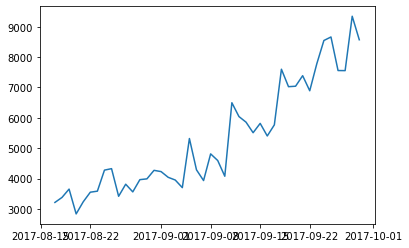

In [10]:
# 最基本生成
plt.plot(df['日期'],df['总销售额'])
plt.show()

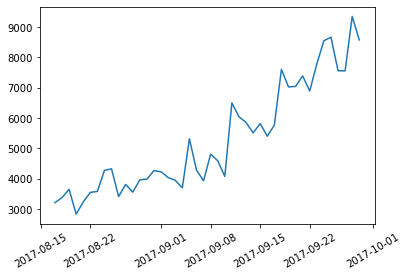

In [11]:
# 设置x轴坐标倾斜
plt.xticks(rotation = 30)
plt.plot(df['日期'],df['总销售额'])
plt.show()

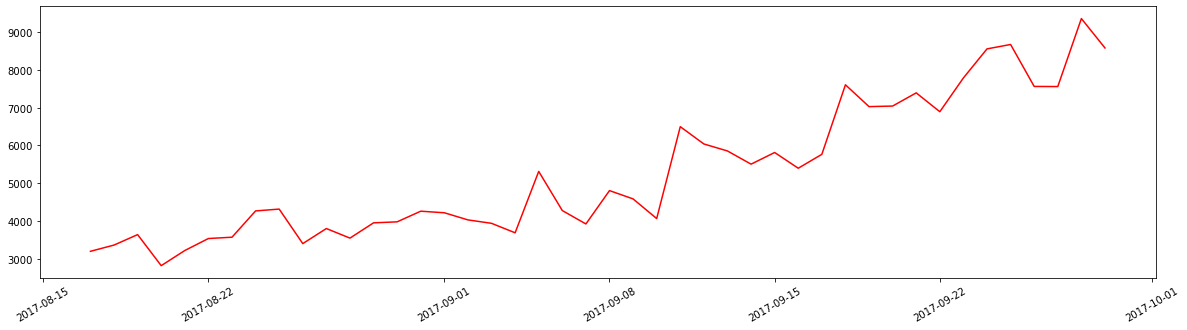

In [12]:
# 设置画布的大小
plt.figure(figsize=(20,5))

plt.xticks(rotation = 30)

# color 参数是改变线条的颜色
plt.plot(df['日期'],df['总销售额'], color = 'red')
plt.show()

/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 21806 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/haoyuexu/opt/anaconda3/lib/python3.8/site-packages/matplot

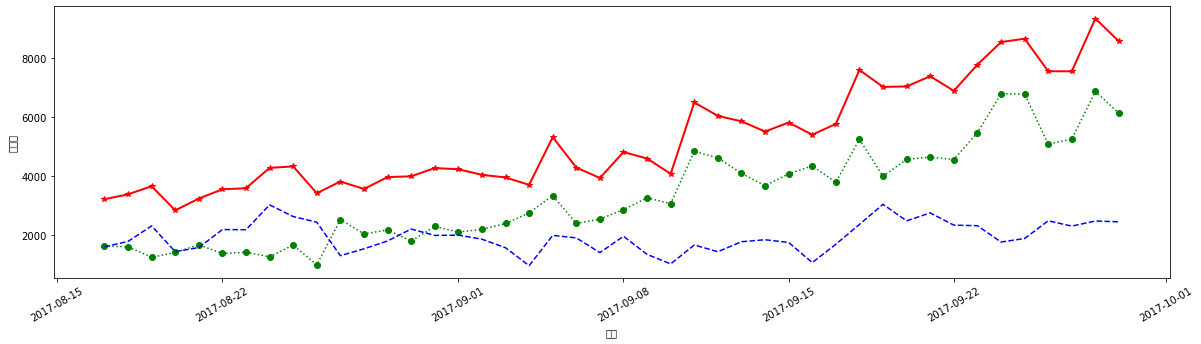

In [13]:
# 一个图上画多个线条
plt.figure(figsize=(20,5))
plt.xticks(rotation = 30)

# linewidth是控制线条的宽度
# marker是控制每一个坐标点上标记的样式
# linestyle是控制线的样式
plt.plot(df['日期'],df['总销售额'],color='red',linewidth=2,marker='*')
plt.plot(df['日期'],df['自配送销售额'],color='green',marker='o',linestyle=':')
plt.plot(df['日期'],df['FBA销售额'],color='blue',linestyle='--')

# 解决中文显示问题
# windows
# font = {'family':'SimHei',
#        "size":"20"}
# plt.rc('font',**font)

# mac
font = {"family":"Arial Unicode MS","size":"20"}
plt.rc("font",**font)

# 设置x轴和y轴的说明
plt.xlabel('时间')
plt.ylabel('销售额')
plt.show()

## 柱形图

In [14]:
df = pd.read_excel('长尾分布.xlsx')
df.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


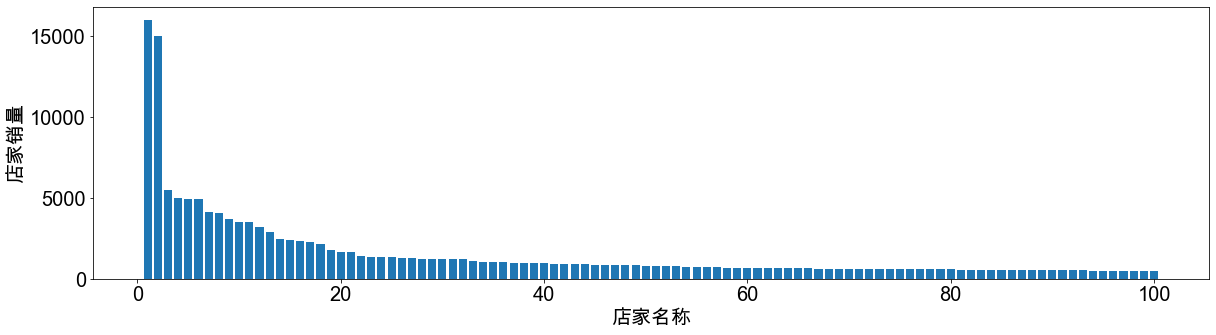

In [15]:
plt.figure(figsize = (20,5))

plt.bar(df['排序'],df['销量'])

plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

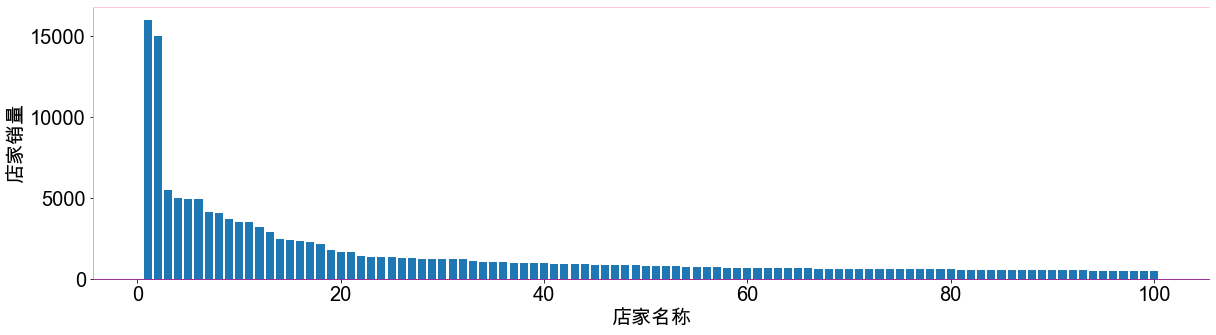

In [16]:
plt.figure(figsize = (20,5))

plt.bar(df['排序'],df['销量'])

# 设置边框的颜色
ax = plt.gca()
# 修改右侧边框的颜色
ax.spines['right'].set_color('white')
# 修改左侧边框的颜色
ax.spines['left'].set_color('orange')
# 修改顶部边框的颜色
ax.spines['top'].set_color('pink')
# 修改底部边框的颜色
ax.spines['bottom'].set_color('purple')


plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

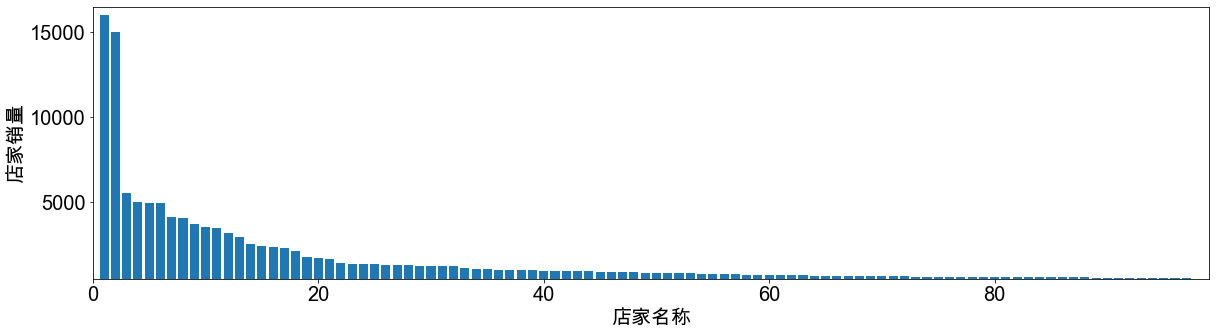

In [17]:
plt.figure(figsize = (20,5))

plt.bar(df['排序'],df['销量'])

# 调整x轴和y轴开始的位置
# 设置x轴刻度
plt.xlim(df.index.values[0],df.index.values[-1])
# 设置y轴刻度
plt.ylim(np.min(df['销量']),np.max(df['销量'])+500)

plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

## 条形图

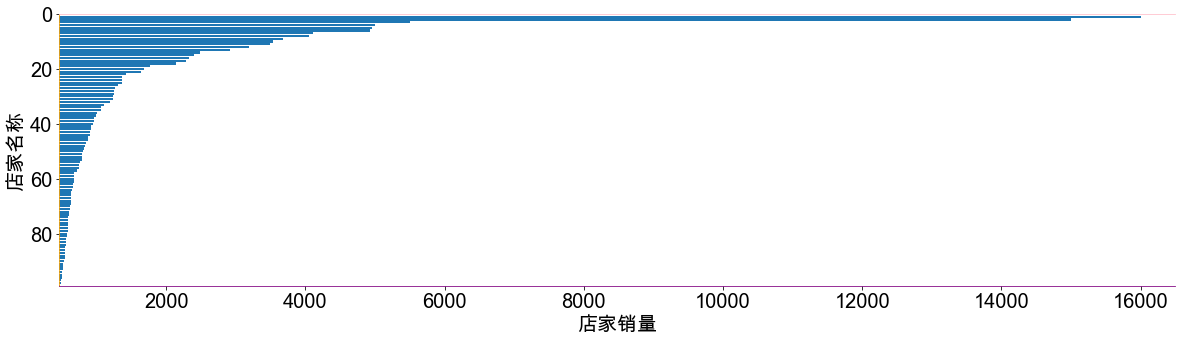

In [18]:
plt.figure(figsize = (20,5))

plt.barh(df['排序'],df['销量'])

# 设置边框的颜色
ax = plt.gca()
# 修改右侧边框的颜色
ax.spines['right'].set_color('white')
# 修改左侧边框的颜色
ax.spines['left'].set_color('orange')
# 修改顶部边框的颜色
ax.spines['top'].set_color('pink')
# 修改底部边框的颜色
ax.spines['bottom'].set_color('purple')

# 调整x轴和y轴开始的位置
# 设置y轴刻度
plt.ylim(df.index.values[-1],df.index.values[0])
# 设置x轴刻度
plt.xlim(np.min(df['销量']),np.max(df['销量'])+500)

plt.xlabel('店家销量')
plt.ylabel('店家名称')
plt.show()



## 饼图

In [19]:
df = pd.read_excel('折线图.xlsx')
df.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


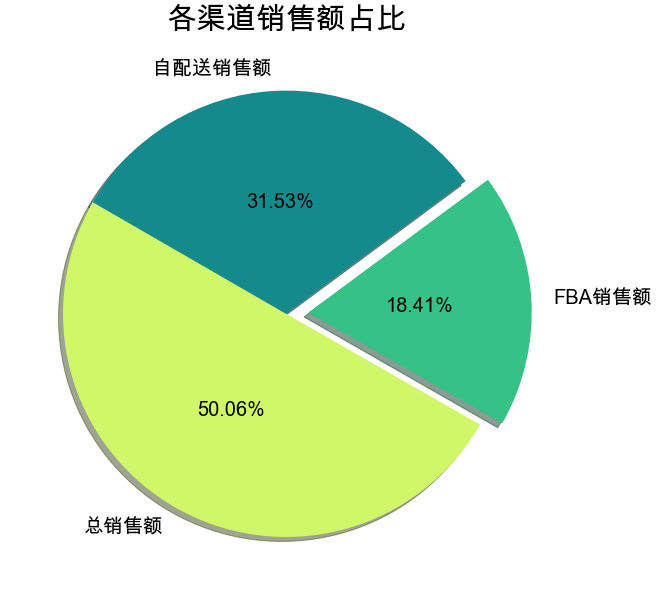

In [20]:
# 计算不同销售额的占比

plt.figure(figsize=(10,18))
sum_sale = np.sum(df['总销售额'])
fba_sale = np.sum(df['FBA销售额'])
self_sale = np.sum(df['自配送销售额'])
data_list = [sum_sale,fba_sale,self_sale]
labels = ['总销售额','FBA销售额','自配送销售额']

plt.pie(data_list,                                  # 数据
        labels = labels,                              # 数据标签
        colors = ['#D0F66A','#36C186','#158A8C'],   # 饼图的颜色
        shadow = True,                              # 是否有阴影
        labeldistance = 1.1, # 文本的位置离远点有多远，1.1指1.1倍半径的位置
        pctdistance = 0.5,
        autopct = '%.2f%%', # 圆里面的文本格式，%3.1f%%表示小数有一位，整数有三位的浮点数
        startangle = 150, # 起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
        explode = [0,0.1,0] # 将某部分爆炸出来， 使用括号，将第二块分割出来，数值的大小是分割出来的与其他两块的间
        )

# 设置图形的title
plt.title('各渠道销售额占比',loc = 'center', fontdict = {'size':'30'})
plt.show()

## 散点图
散点图有时也可以演化成气泡图

In [21]:
df = pd.read_excel('气泡图.xlsx')
df

,产品编号,广告ROI,平均单个订单成本,订单额
0,1,15.0,6,700
1,2,12.0,30,8400
2,3,1.0,7,350
3,4,5.0,10,500
4,5,6.5,25,4000
5,6,12.5,5,2500
6,7,1.0,25,1800
7,8,3.0,20,2000
8,9,10.0,10,8000
9,10,7.5,4,1200


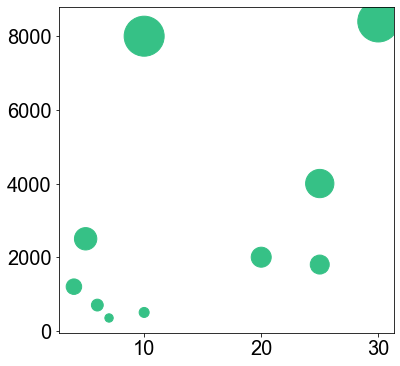

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(df['平均单个订单成本'],df['订单额'],
            s = df['订单额']/5,   # 控制球的大小
            marker = 'o',
            c = '#36C186')
plt.show()

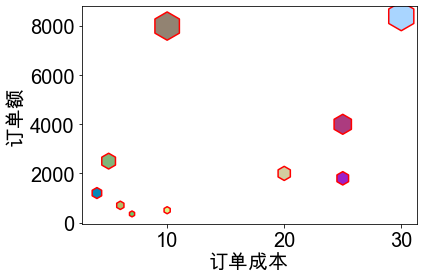

In [23]:
# 补充：使用RGB随机生成气泡图的颜色
# 颜色是RGB值构成的
# RGB颜色对照表其实是有0到9以及字母A到F组成的16进制的一个数字

# 随机生成一个RGB颜色的函数
import random
def random_colors(numbers):
    colors = []
    number = 0
    while number < numbers:
        color_array = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color = ""
        for i in range(6):
            color += color_array[random.randint(0,len(color_array)-1)]
        color = "#" + color
        colors.append(color)
        number += 1
    return colors

colors = random_colors(10)
colors
        

plt.scatter(df['平均单个订单成本'],df['订单额']
           ,s=df['订单额']/10  # 这个是控制球的大小
           ,marker='h'   # 这个是控制形状的
            ,c=colors
            ,linewidths = 1.5  # 边框宽度
            ,edgecolors='red'
           )
plt.xlabel('订单成本')
plt.ylabel('订单额')
plt.show()

In [26]:
# 补充： 尝试设置颜色的渐变
df1 = df.sort_values('订单额')
x = []
for i in df1.index.values:
    x.append(random.randint(10,1000))
df1['人力投入'] = x
df1

,产品编号,广告ROI,平均单个订单成本,订单额,人力投入
2,3,1.0,7,350,569
3,4,5.0,10,500,35
0,1,15.0,6,700,67
9,10,7.5,4,1200,960
6,7,1.0,25,1800,562
7,8,3.0,20,2000,535
5,6,12.5,5,2500,967
4,5,6.5,25,4000,617
8,9,10.0,10,8000,945
1,2,12.0,30,8400,237


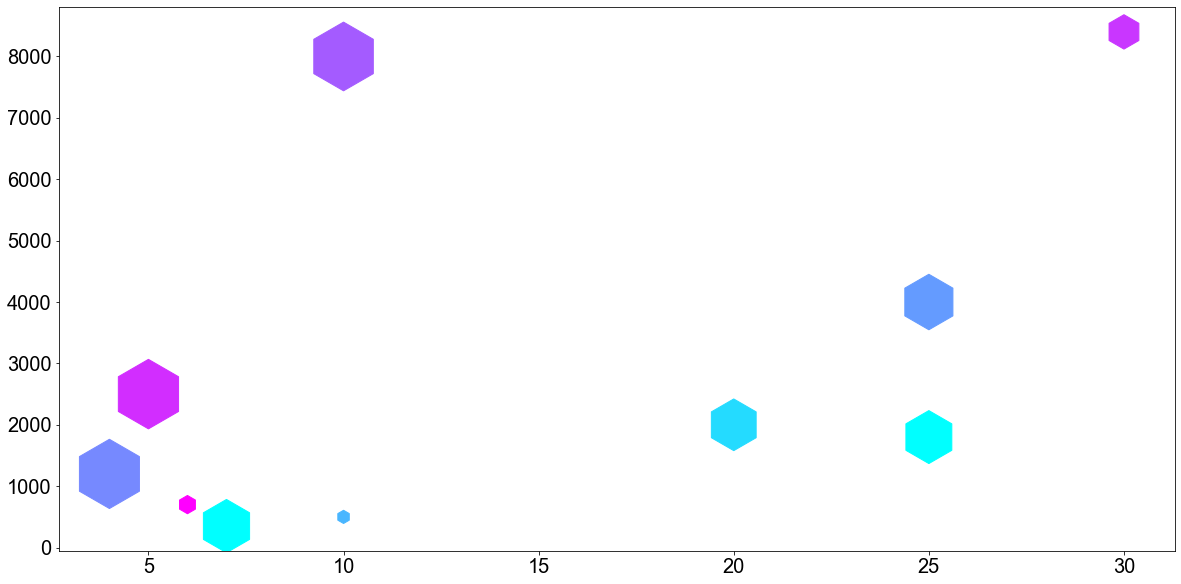

In [34]:
# 结合颜色，图形大小，x和y轴展示4维数据
plt.figure(figsize=(20,10))
# 渐变色是根据图的绘制来进行排列的，所以需要先排序，然后再绘制，参照y轴大小
# 根据大小设置渐变色

cs = plt.scatter(df1['平均单个订单成本'], df1['订单额'],
                s = df1['人力投入']*5,
                marker = 'h',
                c = df1['广告ROI'],
                cmap = 'cool')